In [41]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [78]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Parameters

In [103]:
batch_size = 4
epochs = 4
lr = 0.001

# MNIST Dataset

In [102]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [87]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [88]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [89]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dow', 'frog', 'jorse', 'ship', 'truck')

# show Sample Data

In [90]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([256, 3, 32, 32]) torch.Size([256])


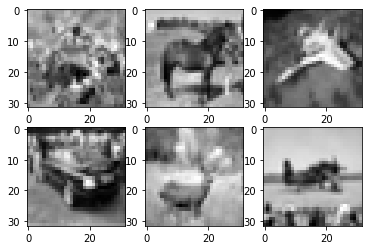

In [91]:
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [95]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  #color chanel, out_chanels, Kernel Size
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 80)
        self.fc3 = nn.Linear(80, 10)

    def forward(self, X):
        x = self.pool(F.relu(self.conv1(X)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Training Loop
n_total_step = len(train_loader)

for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.to(device)
        labels = labels.to(device)

        # forward
        output = model(images)
        loss = criterion(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'epoch {epoch + 1} / {epochs}, step [{i + 1}/{n_total_step}], loss = {loss.item():04f}')
# test pass
with torch.no_grad():
    n_correct = 0
    n_samples = 0

    n_class_correct = [0 for i in range(10)]
    n_class_sample = [0 for i in range(10)]

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        out = model(images)

        _, predicted = torch.max(out, 1)
        n_samples += labels.size(0)
        n_correct = (predicted == labels).sum().item()

        for i in range(len(labels)):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_sample[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Test Accuracy: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_sample[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


epoch 1 / 4, step [100/196], loss = 1.752103
epoch 2 / 4, step [100/196], loss = 1.376150
epoch 3 / 4, step [100/196], loss = 1.344310
epoch 4 / 4, step [100/196], loss = 1.377883
Test Accuracy: 0.09 %
Accuracy of plane: 58.1 %
Accuracy of car: 50.4 %
Accuracy of bird: 54.6 %
Accuracy of cat: 30.7 %
Accuracy of deer: 40.6 %
Accuracy of dow: 33.6 %
Accuracy of frog: 69.7 %
Accuracy of jorse: 63.7 %
Accuracy of ship: 68.8 %
Accuracy of truck: 50.1 %
